<a href="https://colab.research.google.com/github/MatheusSC017/ComputerVision_CharacterClassification/blob/main/ComputerVisionCharacterClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Character classification

In [ ]:
# Librarys to import the dataset
import zipfile
from tensorflow.keras.datasets import mnist
# Packages to manipulate data
import numpy as np
import pandas as pd
# Librarys to plot graphs and figures
import matplotlib.pyplot as plt
import seaborn as sns
# Packages to manipulate images and perform the preprocessing of the data
import cv2
import imutils
from google.colab.patches import cv2_imshow
from imutils.contours import sort_contours
from imutils.object_detection import non_max_suppression
from imblearn.under_sampling import RandomUnderSampler
# Method to split the data in valid and train sub-datasets
from sklearn.model_selection import train_test_split 
# Librarys to create a neural network
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## MNIST data import
In this step, we'll import the dataset MNIST

In [ ]:
# Data import
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# Concatenating the data
data_num = np.concatenate([train_data, test_data], axis=0)
labels_num = np.hstack([train_labels, test_labels])

In [ ]:
data_num.shape, labels_num.shape

((70000, 28, 28), (70000,))

In [ ]:
# The values are in the range of 0 to 255
data_num[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# The images are with a negative filter, so let's invert the values ​​for a better view
img = 255 - data_num[np.random.randint(0, len(data_num))]
cv2_imshow(img)

In [ ]:
# Labels of the MNIST
np.unique(labels_num)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


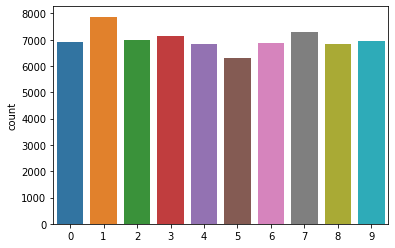

In [ ]:
# Data distribution
sns.countplot(labels_num)

## Alphabetical data import
The next step is import the dataset of alfabetic characters

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2021-12-23 20:10:23--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  12.3MB/s    in 19s     

2021-12-23 20:10:42 (9.98 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Dataset extraction
zip_object = zipfile.ZipFile(file='/content/alfabeto_A-Z.zip', mode='r')
zip_object.extractall('./')
zip_object.close()
# Reading the file
A_ZHandwritten_data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [ ]:
A_ZHandwritten_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Separating data from labels
data_alfa = A_ZHandwritten_data.drop('0', axis=1)
label_alfa = A_ZHandwritten_data['0'].astype('long')

In [ ]:
data_alfa.shape, label_alfa.shape

((372450, 784), (372450,))

In [ ]:
# Reshaping the data
data_alfa = np.reshape(data_alfa.values, (-1, 28, 28))

In [ ]:
data_alfa.shape, label_alfa.shape

((372450, 28, 28), (372450,))

In [ ]:
# Example de image of the dataset
img = 255 - data_alfa[np.random.randint(0, len(data_alfa))]
cv2_imshow(img)

In [ ]:
# The labels are represented numerically
np.unique(label_alfa)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


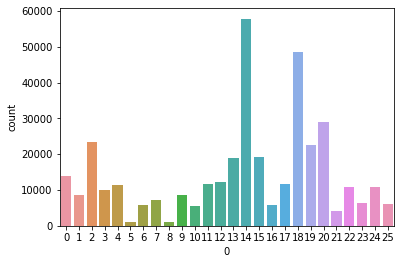

In [ ]:
# Distribution of the data for each label
sns.countplot(label_alfa)

## Concatenation of the data
In this step, we are going to concatenate the MNIST and alphabetical datasets into a single database

In [ ]:
# Concatening data and labels
data = np.vstack([data_num, data_alfa])                         
labels = np.hstack([labels_num, label_alfa + 10])                         

In [ ]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
img = data[np.random.randint(0, len(data))]
cv2_imshow(img)

In [ ]:
# There is a total of 36 diferent labels
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


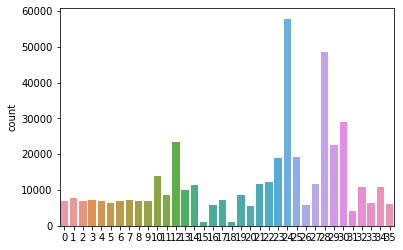

In [ ]:
# Distribution of the data
sns.countplot(labels)                                                                     

## Pre-precessing
stardardize the scale dividing the bytes that make up the image by 255 and calculating the weights for each label

<BarContainer object of 36 artists>

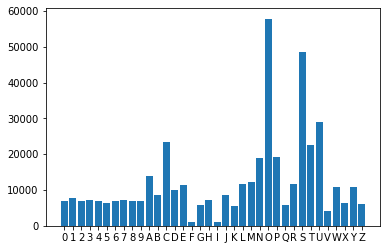

In [ ]:
# Distribution of the data with labels 
class_total = np.array([sum(labels == i) for i in range(36)])
lista_caracteres = [c for c in '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ']
plt.bar(lista_caracteres, class_total)

In [ ]:
# As the data is not evenly distributed we will calculate weights that will be used to flatten the training for all labels
class_weigth = np.array([class_total[np.argmax(class_total)] / t 
                         for t in class_total])
print(class_weigth)

[ 8.3767927   7.34099276  8.27253219  8.09760538  8.47376905  9.15967052
  8.40968586  7.92883587  8.47252747  8.31057775  4.16937054  6.67108906
  2.47020377  5.70603908  5.05463287 49.7205503  10.03557792  8.01122195
 51.62946429  6.80854822 10.32036409  4.99093734  4.6875      3.04182009
  1.          2.98976268  9.94924295  4.9995677   1.19426258  2.57057124
  1.99341561 13.82711621  5.36211053  9.21954719  5.32507597  9.51695194]


In [ ]:
# Function to normalize the data
def normalizer_data(data):
  normalized_data = data / 255.0                                              
  return normalized_data

In [ ]:
normalized_data = normalizer_data(np.array(data, dtype=np.float32))        

In [ ]:
normalized_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [ ]:
normalized_data[0].min(), normalized_data[0].max()                              

(0.0, 1.0)

In [ ]:
normalized_data.shape, labels.shape                                    

((442450, 28, 28), (442450,))

In [ ]:
# Division of the data in train and test dataset
x_train, x_valid, y_train, y_valid = train_test_split(normalized_data, labels, 
                                                    test_size=0.1, stratify=labels, 
                                                    random_state =1)

In [ ]:
x_train.shape, x_valid.shape

((398205, 28, 28), (44245, 28, 28))

In [ ]:
y_train.shape, y_valid.shape 

((398205,), (44245,))

## Convolutional Neural Network class
The class below will give us most of the tools needed to train and analyze our model, such as the "fit" and "forward" (Method to make predictions) method and other functions to plot graphs and make tables like the confusion table.

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_features, out_results, lr, weight_decay, weights):
    """ Defining the network structure, loss function and optimizer method """
    super().__init__()
    self.maxpool = nn.MaxPool2d(2)
    self.dropout = nn.Dropout(0.10)
    self.conv1 = nn.Conv2d(in_features, 32, 3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1, padding='same')
    self.conv3 = nn.Conv2d(64, 128, 3, 1, padding='valid')

    self.dim_conv = self.calculateOutConv()

    self.linear1 = nn.Linear(self.dim_conv, 256)
    self.linear2 = nn.Linear(256, 128)
    self.linear3 = nn.Linear(128, out_results)

    self.loss = nn.CrossEntropyLoss(weight=weights)
    self.optimizer = optim.Adam(self.parameters(), lr=lr,
                                weight_decay=weight_decay)   

  def calculateOutConv(self):
    """ Calculate the new shape after flatten the output of the convolution layers """
    data = torch.tensor(np.zeros((1, 1, 28, 28), dtype=np.float32))
    x = self.forward_conv(data)
    dims = x.shape[1:]
    return np.prod(dims)

  def forward_conv(self, data):
    """ Method to apply convolution layers to data """
    x = torch.relu(self.conv1(data))
    x = self.maxpool(x)
    x = torch.relu(self.conv2(x))
    x = self.maxpool(x)
    x = torch.relu(self.conv3(x))
    x = self.maxpool(x)
    return x
  
  def forward_train(self, data):
    """ Forward method for the training process """
    x = self.forward_conv(data)
    x = torch.relu(self.linear1(x.view(-1, self.dim_conv)))
    x = self.dropout(x)
    x = torch.relu(self.linear2(x))
    x = self.dropout(x)
    x = torch.softmax(self.linear3(x), 1)
    return x
  
  def forward(self, data):
    """ Forward method for the prediction process """
    x = self.forward_conv(data)
    x = torch.relu(self.linear1(x.view(-1, self.dim_conv)))
    x = torch.relu(self.linear2(x))
    x = torch.softmax(self.linear3(x), 1)
    return x

  def backward(self, x_train, y_train, x_test, y_test, epochs, batch_size):  
    """ Method to fit the parameters of the model """
    x_batchs, y_batchs = self.split_batchs(x_train, y_train, batch_size)

    losses = []
    accuracys = []
    accuracys_train = []
    precisions = []
    recalls = []

    l = 0
    for i in range(epochs):
      for x_batch, y_batch in zip(x_batchs, y_batchs):
        
        x_batch = torch.tensor(x_batch) 
        y_batch = torch.tensor(y_batch)
  
        x_batch = torch.tensor(self.expand_dims(x_batch, x_batch.shape[0]))
        
        y_pred = self.forward_train(x_batch)
        loss = self.loss(y_pred, y_batch)
        if l % 100000 == 0:
          losses.append(loss)
        else:
          l += 1

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

      accuracy_train, _, _ = self.validation(x_train, y_train)
      accuracy, precision, recall = self.validation(x_test, y_test)

      accuracys.append(accuracy)
      accuracys_train.append(accuracy_train)
      precisions.append(precision)
      recalls.append(recall)

      print('Epoch ', (i + 1), ', Accuracy: ', accuracy * (100), '%, Loss: ', loss)

    self.generate_graphs(accuracys, precisions, recalls, losses)

    return accuracys, accuracys_train, precisions, recalls, losses

  def generate_graphs(self, accuracys, precisions, recalls, losses):
    """ Method to generate graphs to analyse the model created """
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.xlabel('Epocas')
    plt.xticks((0, 20))
    plt.ylabel('Porcentagem')
    plt.yticks((0.0, 1.0))
    plt.title('Accuracy')
    plt.plot(accuracys)

    plt.subplot(2, 2, 2)
    plt.xlabel('Epocas')
    plt.xticks((0, 20))
    plt.ylabel('Porcentagem')
    plt.yticks((0.0, 1.0))
    plt.title('Precisions')
    plt.plot(precisions)

    plt.subplot(2, 2, 3)
    plt.xlabel('Epocas')
    plt.xticks((0, 20))
    plt.ylabel('Porcentagem')
    plt.yticks((0.0, 1.0))
    plt.title('Recalls')
    plt.plot(recalls)

    plt.subplot(2, 2, 4)
    plt.xlabel('100 mil passos')
    plt.ylabel('Loss')
    plt.title('Losses')
    plt.plot(losses)

    plt.tight_layout()
    plt.show()

  def validation(self, x_test, y_test):
    """ Method to check the quality of the model """
    total_pred = np.zeros(36)
    total_target = np.zeros(36)
    total_positives = np.zeros(36)
    
    # We will split the test data into batches to avoid overloading the processor
    x_batchs, y_batchs = self.split_batchs(x_test, y_test, 1000)

    for x_batch, y_batch in zip(x_batchs, y_batchs):

      x_val = torch.tensor(x_batch) 
      y_val = torch.tensor(y_batch)

      x_val = torch.tensor(self.expand_dims(x_val, x_val.shape[0]))

      y_pred = self.forward(x_val)

      for i in range(36):
        t_indices = y_val == i
        total_pred[i] += torch.sum(torch.argmax(y_pred, axis=1) == i)
        total_target[i] += torch.sum(t_indices)
        total_positives[i] += torch.sum(torch.argmax(y_pred[t_indices], axis=1) == y_val[t_indices])
    
    precision = np.nan_to_num([p / t for p, t in zip(total_positives, total_pred)])  
    recall = np.nan_to_num([p / t for p, t in zip(total_positives, total_target)])
    accuracy = total_positives.sum() / total_target.sum()
    return accuracy, precision, recall
  
  def split_batchs(self, x_data, y_data, batch_size):
    """ Method to split the data in batchs that will be used to training process """
    len_b = len(x_data) // batch_size
    if len(data) % batch_size != 0:
      len_b += 1

    x_batchs = []
    y_batchs = []
    for b in range(len_b):
      if b == (len_b - 1):
        x_batch = x_data[(b * batch_size):]
        y_batch = y_data[(b * batch_size):]
      else:
        x_batch = x_data[(b * batch_size):((b + 1) * batch_size)]
        y_batch = y_data[(b * batch_size):((b + 1) * batch_size)]
      x_batchs.append(x_batch)
      y_batchs.append(y_batch)

    return x_batchs, y_batchs

  def expand_dims(self, data, samples):
    """ Method to resize the dimensions of the entries """
    expand_data = np.resize(data, (samples, 1, 28, 28))
    return expand_data

  def save_model(self, file):
    """ Method to save the model """
    torch.save(self.state_dict(), file)

  def load_model(self, file):
    """ Method to load the model """
    self.load_state_dict(torch.load(file))

## Fitting the model and analyse of the results

### Training
To start, we will instantiate our class to create our model and then we will call the fit method, passing as parameters the training and validation data, the number of epochs that the network will be adjusted and the batch size.

In [ ]:
network = NeuralNetwork(1, 36, 1e-4, 1e-6, torch.FloatTensor(class_weigth))

Epoch  1 , Accuracy:  91.48378347835914 %, Loss:  tensor(0.3256, grad_fn=<NllLossBackward0>)
Epoch  2 , Accuracy:  94.47621200135609 %, Loss:  tensor(0.2344, grad_fn=<NllLossBackward0>)
Epoch  3 , Accuracy:  95.48197536444796 %, Loss:  tensor(0.1367, grad_fn=<NllLossBackward0>)
Epoch  4 , Accuracy:  95.26952197988473 %, Loss:  tensor(0.1235, grad_fn=<NllLossBackward0>)
Epoch  5 , Accuracy:  95.85715900101707 %, Loss:  tensor(0.1986, grad_fn=<NllLossBackward0>)
Epoch  6 , Accuracy:  96.10577466380383 %, Loss:  tensor(0.1037, grad_fn=<NllLossBackward0>)
Epoch  7 , Accuracy:  96.02214939541192 %, Loss:  tensor(0.1374, grad_fn=<NllLossBackward0>)
Epoch  8 , Accuracy:  96.93976720533394 %, Loss:  tensor(0.0607, grad_fn=<NllLossBackward0>)
Epoch  9 , Accuracy:  96.90360492711041 %, Loss:  tensor(0.0838, grad_fn=<NllLossBackward0>)
Epoch  10 , Accuracy:  96.98723019550232 %, Loss:  tensor(0.0776, grad_fn=<NllLossBackward0>)


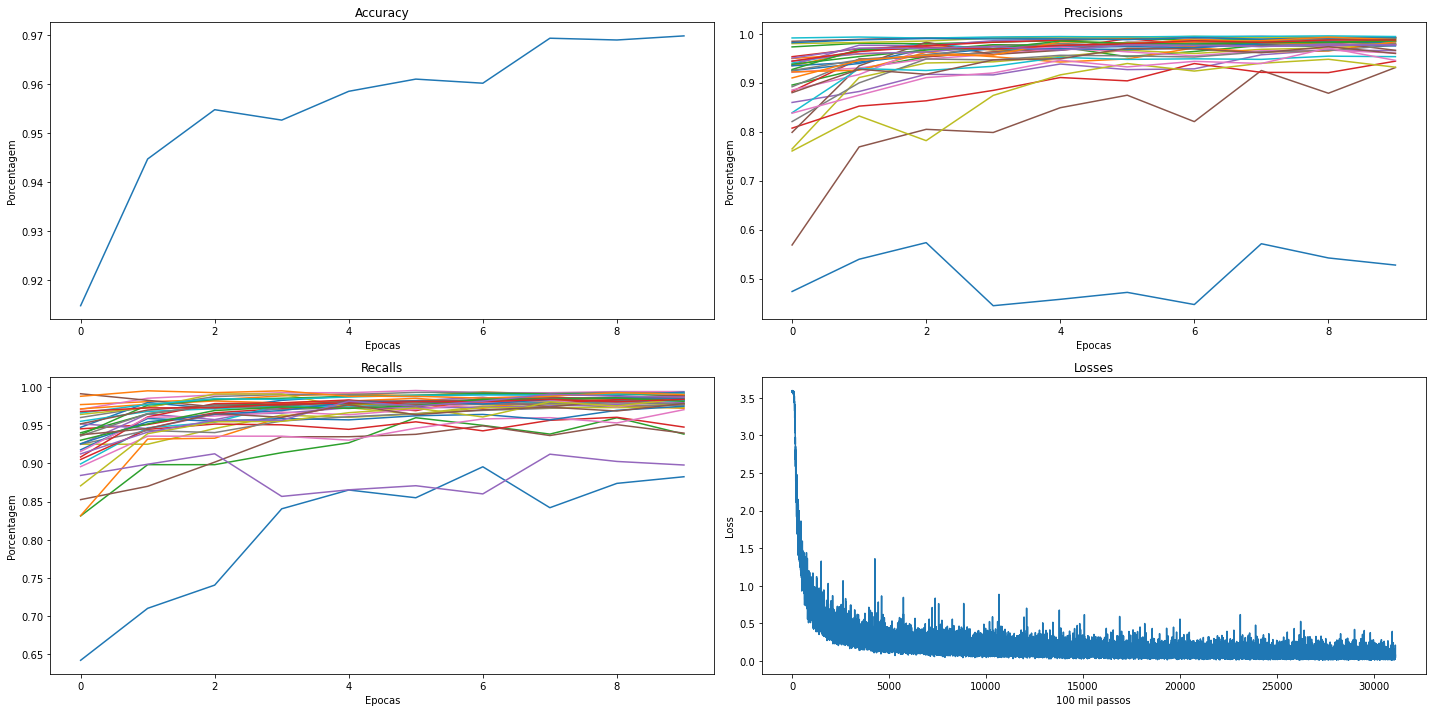

In [ ]:
accuracys, precisions, recalls, losses = network.backward(x_train, y_train, x_valid, y_valid, 10, 128)

### Parameters per layer
The code cell below will show us the composition, in number of parameters, of our network, that is, the output will be the number of parameters per layer and the sum for the model

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'__\n{sum(params):>6}')

In [ ]:
count_parameters(rede)

   288
    32
 18432
    64
 73728
   128
131072
   256
 32768
   128
  4608
    36
__
261540


### Confusion Matrix
Now let's ask our model to do and return the confusion matrix, which is a table with information about the relationship between the predictions and the actual data.

In [ ]:
confusion_matrix = network.confusion_matrix(x_valid, y_valid)

In [ ]:
import pandas as pd
lista_caracteres = list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
df = pd.DataFrame(data=confusion_matrix, index=lista_caracteres, columns=lista_caracteres)
df

,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,609.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,782.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,656.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
3,0.0,0.0,1.0,698.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,670.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,3.0,0.0
5,0.0,0.0,0.0,4.0,0.0,593.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,2.0,684.0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,5.0,4.0,0.0,0.0,0.0,723.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,667.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,4.0,687.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Precision x Recall
The graph plotted for the cell code below compares two important metrics of the classification process, they are Recall and Precision.

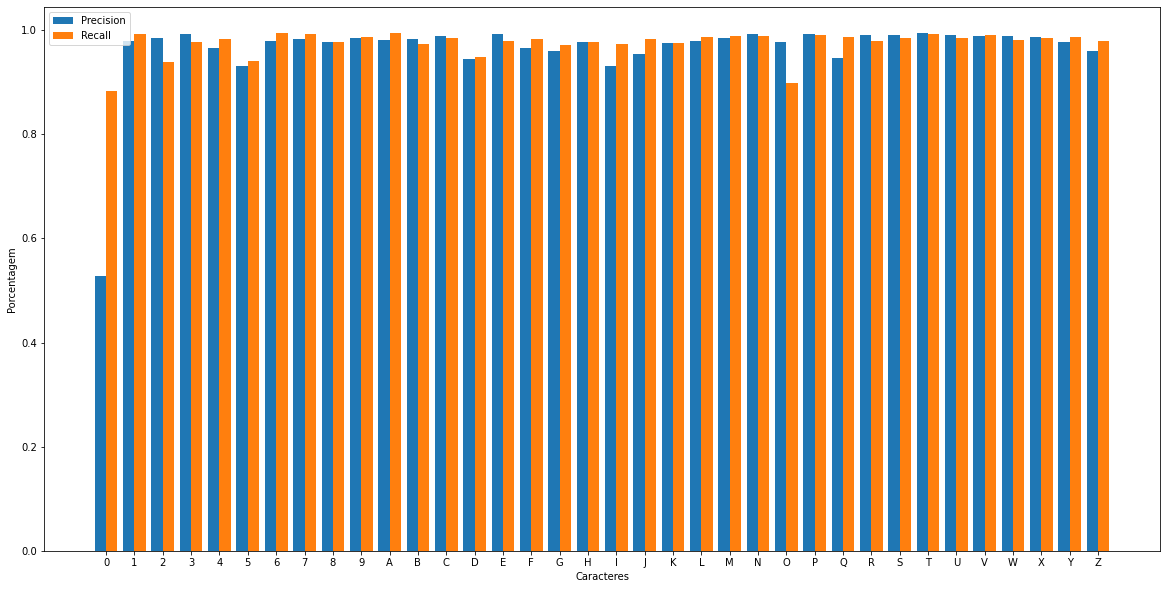

In [ ]:
lista_caracteres = [c for c in '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ']
plt.figure(figsize=(20, 10))
bar_width = 0.4
r1 = [i for i in range(len(lista_caracteres))]
r2 = [i + bar_width for i in r1]
r3 = [i + bar_width for i in r2]
plt.bar(r2, precisions[-1], width=bar_width, label='Precision')
plt.bar(r3, recalls[-1], width=bar_width, label='Recall')
plt.xlabel('Caracteres')
plt.xticks([i + (bar_width / 2) for i in r2], lista_caracteres)
plt.ylabel('Porcentagem')
plt.legend()
plt.show()

## Text Selection with East
The next step will be to extract the characters from the image and organize them to assemble the text described in the image

In [ ]:
def image_transform(image):
  # Find height and width multiples of 32
  if image_original.shape[0] < image_original.shape[1]:
    altura = image_original.shape[0] - (image_original.shape[0] % 32)
  else:
    altura = image_original.shape[1] - (image_original.shape[1] % 32)
  largura = altura
  # Calculate proportions
  h_proportion = image_original.shape[0] / altura 
  w_proportion = image_original.shape[1] / largura
  # Resize and convert image to blob type
  transformed_image = cv2.resize(image_original, (largura, altura))
  blob = cv2.dnn.blobFromImage(transformed_image, 1.0, (altura, largura),      
                               swapRB = True, crop = False)
  return blob, h_proportion, w_proportion

In [ ]:
def geometric_data(geometry, y):
  x_data_0 = geometry[0, 0, y]
  x_data_1 = geometry[0, 1, y]
  x_data_2 = geometry[0, 2, y]                                                 
  x_data_3 = geometry[0, 3, y]
  data_angulos = geometry[0, 4, y]
  return data_angulos, x_data_0, x_data_1, x_data_2, x_data_3

In [ ]:
def geometric_calculation(data_angulos, x_data_0, x_data_1, x_data_2, x_data_3, 
                          x, y):
  (offset_x, offset_y) = (x * 4.0, y * 4.0)
  angulo = data_angulos[x]
  cos = np.cos(angulo)
  sin = np.sin(angulo)
  h = x_data_0[x] + x_data_2[x]
  w = x_data_1[x] + x_data_3[x]

  end_x = int(offset_x + (cos * x_data_1[x]) + (sin * x_data_2[x]))
  end_y = int(offset_y - (sin * x_data_1[x]) + (cos * x_data_2[x]))
  
  start_x = int(end_x - w)
  start_y = int(end_y - h)

  return start_x, start_y, end_x, end_y

In [ ]:
def select_bounding_box(bounding_box):
  bounding_box_copy = bounding_box.copy()
  
  selected_box = []
  while True:
    
    bounding = bounding_box_copy[0]
    bounding_box_copy.remove(bounding)
    i = 0
    
    while True:   

      if (len(bounding_box_copy) == i) or (len(bounding_box_copy) == 0):
        break
  
      check_box = bounding_box_copy[i]    
      inter_x = min((bounding[2], check_box[2])) - max((bounding[0], check_box[0]))
      inter_y = min((bounding[3], check_box[3])) - max((bounding[1], check_box[1]))
      if (((bounding[0] <= check_box[0]) and (bounding[2] >= check_box[0])) or
          ((bounding[0] <= check_box[2]) and (bounding[2] >= check_box[2])) or
          ((bounding[0] >= check_box[0]) and (bounding[2] <= check_box[2]))) and \
          (((bounding[1] <= check_box[1]) and (bounding[3] >= check_box[1])) or
          ((bounding[1] <= check_box[3]) and (bounding[3] >= check_box[3])) or
          ((bounding[1] >= check_box[1]) and (bounding[3] <= check_box[3]))) and \
          ((inter_x >= 5) and (inter_y >= 5)):
           
        bounding = np.array([min((bounding[0], check_box[0])), 
                             min((bounding[1], check_box[1])),
                            max((bounding[2], check_box[2])), 
                             max((bounding[3], check_box[3]))])
        bounding_box_copy.remove(check_box)
      else:
        i += 1
    
    selected_box.append(bounding)

    if len(bounding_box_copy) == 0:
      break
  return np.array(selected_box)

In [ ]:
def select_objects(geometry, scores, min_confience = 0.9):
  confiences = []
  boundingboxes = []
  lines = geometry.shape[2]
  columns = geometry.shape[3]
  for y in range(lines):

    data_scores = scores[0, 0, y]
    data_angulos, x_data_0, x_data_1, x_data_2, x_data_3 = geometric_data(geometry, y)

    for x in range(columns):
      if data_scores[x] >= min_confience:  
        x_start, y_start, x_end, y_end = geometric_calculation(data_angulos, 
                                                               x_data_0, x_data_1, 
                                                               x_data_2, x_data_3, x, y)
        confiences.append(data_scores[x])
        boundingboxes.append((x_start, y_start, x_end, y_end))
  
  selected_box = select_bounding_box(boundingboxes)
  return selected_box

In [ ]:
def organize_detections(detections):
  orders = np.array(detections).argsort(axis=0)
  coordenates = detections[orders[:, 1]]
  line = []
  lines = []
  for i in range(len(orders)):
    line.append(coordenates[i])
    if (i == len(orders) - 1) or (coordenates[i + 1, 1] > coordenates[i, 3]):
      line = np.array(line)
      line_order = line.argsort(axis=0)
      lines.append(line[line_order[:, 0]])
      line = []
  return lines      

In [ ]:
def extract_words(image, detections, w_proportion, h_proportion,
                  margin_error = 5):
  image_extract = image.copy()
  words_images = []
  for (start_x, start_y, end_x, end_y) in detections:
    start_x = max(0, int(start_x * w_proportion) - margin_error)
    start_y = max(0, int(start_y * h_proportion) - margin_error)
    end_x = min(image.shape[1], int(end_x * w_proportion) + margin_error)
    end_y = min(image.shape[0], int(end_y * h_proportion) + margin_error)
    words_images.append(image_extract[start_y:end_y, start_x:end_x])
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 100, 255), 2)
  return image, words_images

In [ ]:
# Load the image
image_original = cv2.imread('/content/imagem.jpeg')
# Load the network
detector = 'frozen_east_text_detection.pb'
layer_names = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']
east = cv2.dnn.readNet(detector)

In [ ]:
def find_words(image, east, layer_names, min_confiance = 0.9):
  # Process the image
  blob, h_proportion, w_proportion = image_transform(image)
  # Performs the prediction
  east.setInput(blob)
  scores, geometry = east.forward(layer_names)
  # Select the objects
  detections = select_objects(geometry, scores, min_confiance)
  # Organize the detections
  lines = organize_detections(detections)
  # Extract and create a vector with the images
  image_copy = image.copy()                                                  
  text = []
  for l in lines:
    image_copy, line_images = extract_words(image_copy, l, w_proportion, 
                                            h_proportion, 2)
    text.append(line_images)

  return image_copy, text

In [ ]:
image_delimited, text = find_words(image_original, east, layer_names)

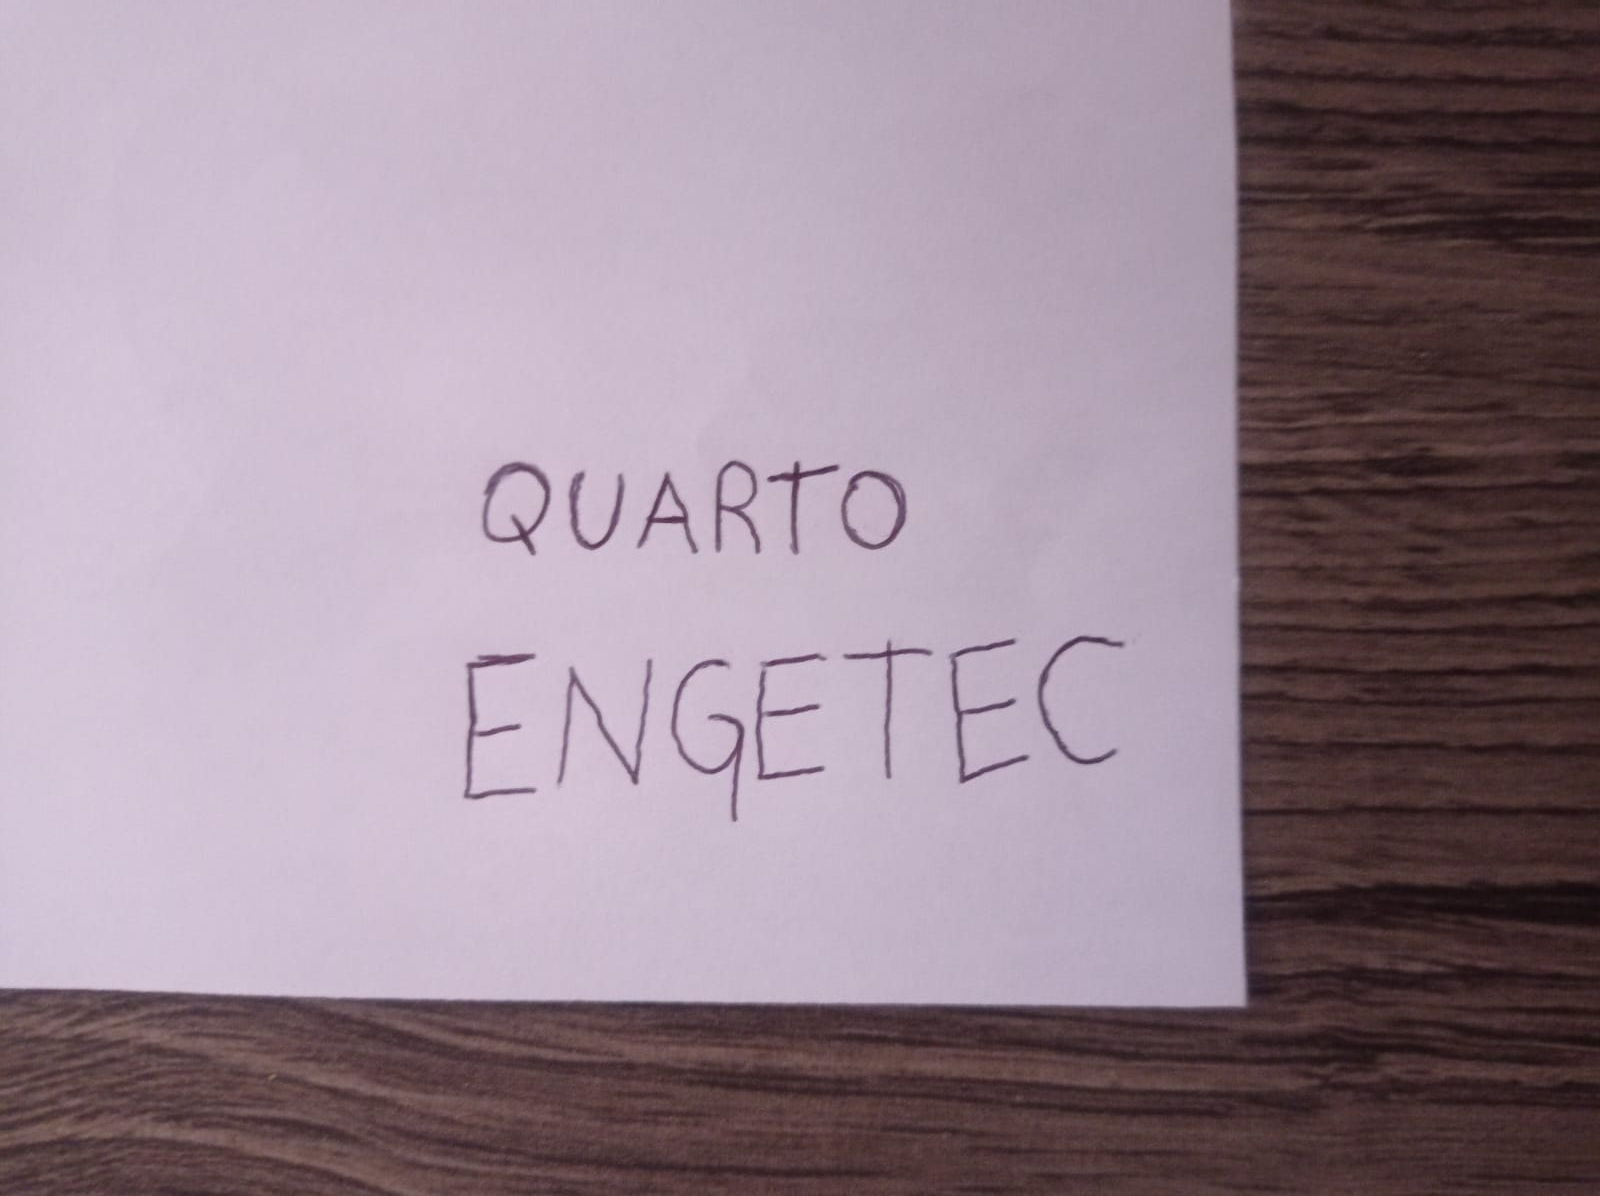

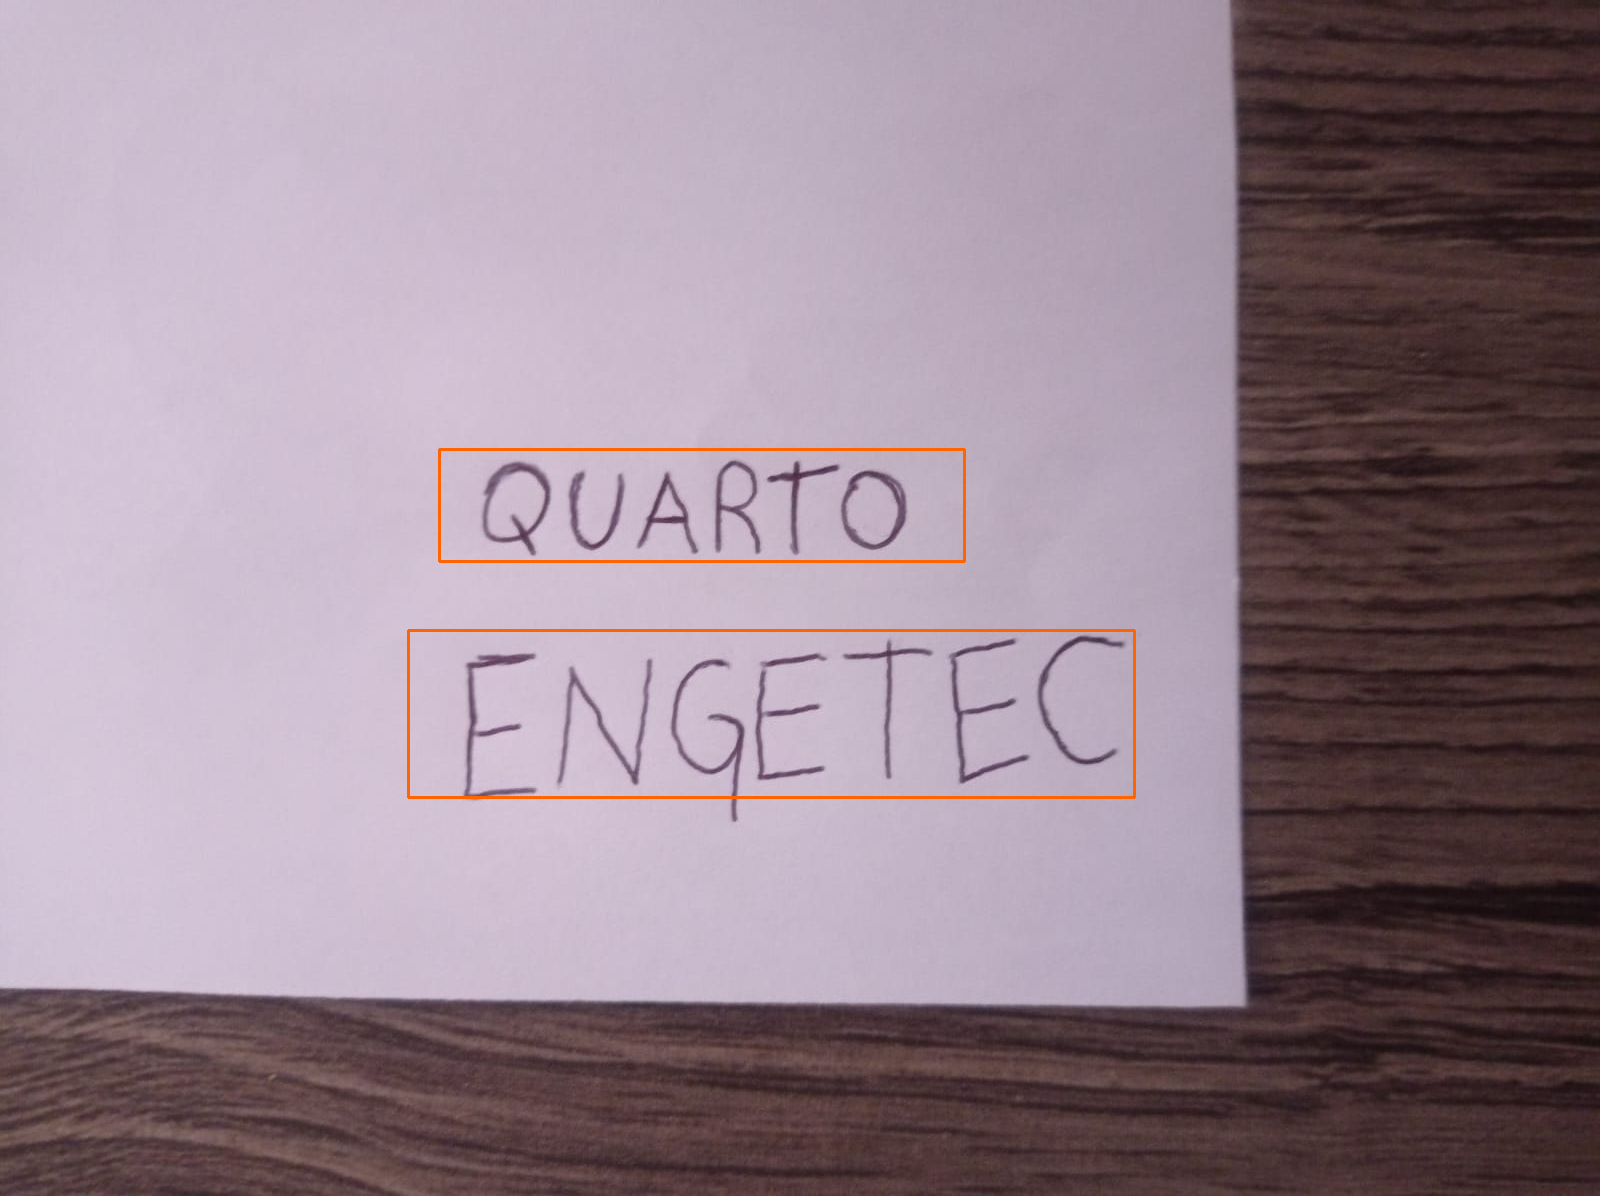

In [ ]:
cv2_imshow(image_original)
cv2_imshow(image_delimited)

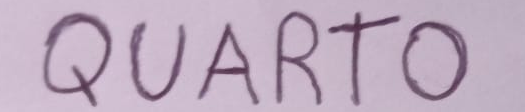

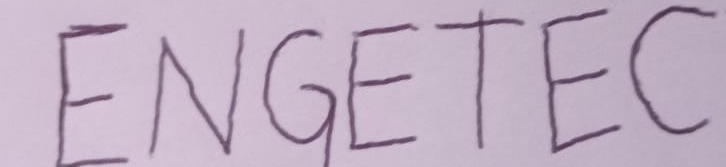

In [ ]:
for line in text:
  for word in line:
    cv2_imshow(word)
    print("\n")

## Pre-processing of real data
In this section, we will create methods to process the extracted character images to a format similar to the images in our training and validation.

In [ ]:
def extract_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]
  return conts

In [ ]:
def extract_figure(img, cont):
  (x, y, w, h) = cont
  figure =  img[y:y+h, x:x+w]
  return figure

In [ ]:
def limiarization(img):
  thresh_img = cv2.threshold(img, 0, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C | 
                             cv2.THRESH_OTSU)[1]
  return thresh_img

In [ ]:
def resize_image(img, margem = 5):
  (a, l) = img.shape
  if l > a:
    resized_img = imutils.resize(img, width=28)
  else:
    resized_img = imutils.resize(img, height=28)
  
  (a, l) = resized_img.shape
  dx = int(max(0, 28 - l) / 2.0)
  dy = int(max(0, 28 - a) / 2.0)

  resized_img = cv2.copyMakeBorder(resized_img, top=dy + margem, bottom=dy + margem, 
                                   left=dx + margem, right=dx + margem,
                                   borderType=cv2.BORDER_CONSTANT, 
                                   value=(0, 0, 0))
  resized_img = cv2.resize(resized_img, (28, 28))
  return resized_img

In [ ]:
def normalize_image(img):
  normalized_img = img / 255.0
  normalized_img = np.resize(normalized_img, (1, 1, 28, 28))                    
  return normalized_img

In [ ]:
def process_caracters(img, cont):
  extracted_figures = extract_figure(img, cont)
  thresh_img = limiarization(extracted_figures)
  resized_img = resize_image(thresh_img) 
  cv2_imshow(resized_img) 
  print("")                               
  normalized_img = normalize_image(resized_img)
  return normalized_img

## Model application
Now, let's apply the computer vision method and the created model on a real image

In [ ]:
def preprocess_image(image):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  processed_image = cv2.GaussianBlur(gray_image, (3, 3), 7)
  processed_image = cv2.Canny(processed_image, 10, 50)
  processed_image = cv2.dilate(processed_image, np.ones((3, 3)))
  return gray_image, processed_image                                                       

In [ ]:
lista_caracteres = list('OIZEASGTBPABCDEFGHIJKLMNOPQRSTUVWXYZ')
lista_caracteres2 = list('012345678948603364113233090A57007672')    
str_text = ''
for line in text:
  for word in line:
    gray, processed_image = preprocess_image(word)
    counts = extract_contours(processed_image)

    word_pred = []
    word_indice = []
    for c in counts:
      (x, y, w, h) = cv2.boundingRect(c)
      figure = process_caracters(gray, (x, y, w, h))
      pred = rede.forward(torch.tensor(figure, dtype=torch.float32))
      word_pred.append(pred)
      word_indice.append(torch.argmax(pred))

    #0-9 = Números; 10-35 = Caracteres alfabéticos
    #Verifica se a predominância é de numeros ou letras
    verify_alpha_num = sum([i < 10 for i in word_indice]) / len(word_indice)

    for pred in word_pred:
      if pred[0, torch.argmax(pred)] > 0.1:
        if verify_alpha_num > 0.5:
          str_text += lista_caracteres2[torch.argmax(pred)]
        else:
          str_text += lista_caracteres[torch.argmax(pred)]
    str_text += ' '
  str_text += '\n'  
print(str_text)


QUARTO 
ENGETEC 

